In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:

s = sp.Symbol("s")
def series(*zs: list[sp.Expr]) -> sp.Expr:
    """Return the series of the given list of expressions."""
    return sum(zs)


def shunt(*zs: list[sp.Expr]) -> sp.Expr:
    """Return the shunt of the given list of expressions."""
    return 1 / series(*[1 / z for z in zs])

def create_lc_tf(line_len: int) -> sp.Expr:
    cap_vars = [sp.Symbol(f"c_{i}") for i in range(line_len + 1)]
    ind_vars = [sp.Symbol(f"l_{i}") for i in range(line_len)]

    caps = [1 / (s * cap_vars[i]) for i in range(line_len + 1)]
    inds = [s * ind_vars[i] for i in range(line_len)]


    def lc_series_impedance(loc: int, depth: int) -> sp.Expr:
        """Return the series of LC components."""
        if loc == depth:
            return series(caps[loc], inds[loc - 1])
        elif loc == 0:
            return shunt(caps[0], lc_series_impedance(1, line_len))
        else:
            return series(
                inds[loc - 1],
                shunt(caps[loc], lc_series_impedance(loc + 1, depth)),
            )

    return lc_series_impedance(0, line_len), cap_vars, ind_vars

c_1*c_2*c_3*c_4*l_0*l_1*l_2*l_3*s**8 + s**6*(c_1*c_2*c_3*l_0*l_1*l_2 + c_1*c_2*c_4*l_0*l_1*l_2 + c_1*c_2*c_4*l_0*l_1*l_3 + c_1*c_3*c_4*l_0*l_1*l_3 + c_1*c_3*c_4*l_0*l_2*l_3 + c_2*c_3*c_4*l_0*l_2*l_3 + c_2*c_3*c_4*l_1*l_2*l_3) + s**4*(c_1*c_2*l_0*l_1 + c_1*c_3*l_0*l_1 + c_1*c_3*l_0*l_2 + c_1*c_4*l_0*l_1 + c_1*c_4*l_0*l_2 + c_1*c_4*l_0*l_3 + c_2*c_3*l_0*l_2 + c_2*c_3*l_1*l_2 + c_2*c_4*l_0*l_2 + c_2*c_4*l_0*l_3 + c_2*c_4*l_1*l_2 + c_2*c_4*l_1*l_3 + c_3*c_4*l_0*l_3 + c_3*c_4*l_1*l_3 + c_3*c_4*l_2*l_3) + s**2*(c_1*l_0 + c_2*l_0 + c_2*l_1 + c_3*l_0 + c_3*l_1 + c_3*l_2 + c_4*l_0 + c_4*l_1 + c_4*l_2 + c_4*l_3) + 1

c_0*c_1*c_2*c_3*c_4*l_0*l_1*l_2*l_3*s**9 + s**7*(c_0*c_1*c_2*c_3*l_0*l_1*l_2 + c_0*c_1*c_2*c_4*l_0*l_1*l_2 + c_0*c_1*c_2*c_4*l_0*l_1*l_3 + c_0*c_1*c_3*c_4*l_0*l_1*l_3 + c_0*c_1*c_3*c_4*l_0*l_2*l_3 + c_0*c_2*c_3*c_4*l_0*l_2*l_3 + c_0*c_2*c_3*c_4*l_1*l_2*l_3 + c_1*c_2*c_3*c_4*l_1*l_2*l_3) + s**5*(c_0*c_1*c_2*l_0*l_1 + c_0*c_1*c_3*l_0*l_1 + c_0*c_1*c_3*l_0*l_2 + c_0*c_1*c_4*l_0*l_1 + c_0*c_1*c_4*l_0*l_2 + c_0*c_1*c_4*l_0*l_3 + c_0*c_2*c_3*l_0*l_2 + c_0*c_2*c_3*l_1*l_2 + c_0*c_2*c_4*l_0*l_2 + c_0*c_2*c_4*l_0*l_3 + c_0*c_2*c_4*l_1*l_2 + c_0*c_2*c_4*l_1*l_3 + c_0*c_3*c_4*l_0*l_3 + c_0*c_3*c_4*l_1*l_3 + c_0*c_3*c_4*l_2*l_3 + c_1*c_2*c_3*l_1*l_2 + c_1*c_2*c_4*l_1*l_2 + c_1*c_2*c_4*l_1*l_3 + c_1*c_3*c_4*l_1*l_3 + c_1*c_3*c_4*l_2*l_3 + c_2*c_3*c_4*l_2*l_3) + s**3*(c_0*c_1*l_0 + c_0*c_2*l_0 + c_0*c_2*l_1 + c_0*c_3*l_0 + c_0*c_3*l_1 + c_0*c_3*l_2 + c_0*c_4*l_0 + c_0*c_4*l_1 + c_0*c_4*l_2 + c_0*c_4*l_3 + c_1*c_2*l_1 + c_1*c_3*l_1 + c_1*c_3*l_2 + c_1*c_4*l_1 + c_1*c_4*l_2 + c_1*c_4*l_3 + c_2*c_3*l_2

(s**8 + 7*s**6 + 15*s**4 + 10*s**2 + 1)/(s*(s**8 + 8*s**6 + 21*s**4 + 20*s**2 + 5))

20.7318473165087*s*(0.0494432469616254*s**8 + 0.387093689040831*s**6 + 1.0*s**4 + 0.938096224796671*s**2 + 0.2358833416965)

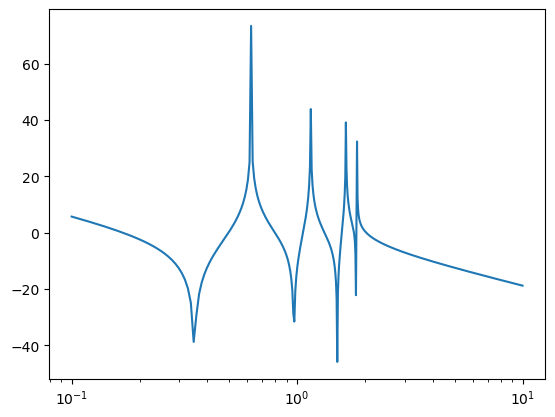

In [3]:

for lc_val in [1]:
    i = 4
    lci, cap_vars, ind_vars = create_lc_tf(i)

    # Replace all caps and inds with 1

    # Express the impedance with a numerator and a denominator
    num, den = sp.cancel(lci, s).as_numer_denom()
    display(num)
    display(den)
    vars = {var: lc_val * np.random.normal(1, 0.1) for var in cap_vars + ind_vars}
    num_subs = num.subs(vars)
    den_subs = den.subs(vars)
    display(sp.simplify(lci.subs({var: lc_val for var in cap_vars + ind_vars})))
    num_coeffs = sp.poly(num_subs).all_coeffs()
    den_coeffs = sp.poly(den_subs).all_coeffs()

    display(sp.factor(den_subs))

    num_coeffs = [float(v) for v in num_coeffs]
    den_coeffs = [float(v) for v in den_coeffs]

    tf = signal.TransferFunction(num_coeffs, den_coeffs)

    # plot the bode plot
    w = np.linspace(1e-1, 10, 1000) / lc_val
    w, mag, phase = signal.bode(tf, w=w)
    plt.figure()
    plt.semilogx(w, mag)
    # plt.figure()
    # plt.semilogx(w, phase)
    plt.show()

    # Plot the pole-zero plot
    # plt.figure()
    # plt.plot(tf.zeros.real, tf.zeros.imag, "o")
    # plt.plot(tf.poles.real, tf.poles.imag, "x")
    # plt.show()



In [4]:
def sspuf_A_matrix(n_bit: int, line_len: int):
    """Generate A matrix for SSPUF symbolic model.

    Args:
        n_bit (int): number of bits
        line_len (int): length of line

    Returns:
        Matrix: A matrix
    """
    cc = sp.var('C_c')
    cap, ind = [[None for _ in range(line_len)] for _ in range(n_bit)], [[None for _ in range(line_len)] for _ in range(n_bit)]
    gm_c = [[[None for _ in range(2)] for _ in range(line_len)] for _ in range(n_bit)]
    gm_l = [[[None for _ in range(2)] for _ in range(line_len)] for _ in range(n_bit)]
    sw_bits = [None for _ in range(n_bit)]

    # g_C_i_j_0: the gm that feed to C_ij
    # g_C_i_j_1: the gm that feedback from C_ij
    # Same for g_L_i_j_0 and g_L_i_j_1
    for i in range(n_bit):
        for j in range(line_len):
            cap[i][j] = sp.var(f'C_{i}_{j}')
            ind[i][j] = sp.var(f'L_{i}_{j}')
            gm_c[i][j][0] = sp.var(f'g_C_{i}_{j}_0')
            gm_c[i][j][1] = sp.var(f'g_C_{i}_{j}_1')
            gm_l[i][j][0] = sp.var(f'g_L_{i}_{j}_0')
            gm_l[i][j][1] = sp.var(f'g_L_{i}_{j}_1')
            sw_bits[i] = sp.var(f'b_{i}')
    

    sub_mat_len = 2 * line_len
    def ith_diag_sub_mat(i: int):
        a_i = sp.zeros(sub_mat_len, sub_mat_len)
        for j in range(sub_mat_len - 1):
            if j % 2 == 0:
                c_idx = j // 2
                a_i[j, j + 1] = - gm_c[i][c_idx][1]
                a_i[j + 1, j] = gm_c[i][c_idx][0]
            else:
                l_idx = j // 2 + 1
                a_i[j, j + 1] = - gm_l[i][l_idx][1]
                a_i[j + 1, j] = gm_l[i][l_idx][0]
        return a_i
    
    ai_row_mats = [ith_diag_sub_mat(i) for i in range(n_bit)]
    for i, diag_mat in enumerate(ai_row_mats):
        left_zeros = sp.zeros(sub_mat_len, sub_mat_len * i)
        right_zeros = sp.zeros(sub_mat_len, sub_mat_len * (n_bit - i - 1))
        ai_row_mats[i] = left_zeros.row_join(diag_mat).row_join(right_zeros)
    

    mid_to_branch_row = sp.zeros(1, sub_mat_len * n_bit)
    mid_to_branch_col = sp.zeros(sub_mat_len * n_bit, 1)
    for i in range(n_bit):
        mid_to_branch_row[0, i * sub_mat_len] = -sw_bits[i] * gm_l[i][0][1]
        mid_to_branch_col[i * sub_mat_len, 0] = sw_bits[i] * gm_l[i][0][0]
    
    A_1_to_n = mid_to_branch_row
    for ai_row_mat in ai_row_mats:
        A_1_to_n = A_1_to_n.col_join(ai_row_mat)
    

    A_mat = sp.zeros(1, 1).col_join(mid_to_branch_col).row_join(A_1_to_n)

    LC_mat = sp.zeros(A_mat.shape[0], A_mat.shape[1])
    LC_mat[0, 0] = 1/cc
    for i in range(n_bit):
        for j in range(line_len):
            idx = 1 + i * sub_mat_len + 2 * j
            LC_mat[idx, idx] = 1/ind[i][j]
            LC_mat[idx + 1, idx + 1] = 1/cap[i][j]

    return LC_mat * A_mat, cc, cap, ind, gm_c, gm_l, sw_bits


n_bit, line_len = 1, 4
A_mat, cc, cap, ind, gm_c, gm_l, sw_bits = sspuf_A_matrix(n_bit, line_len)
B_mat, C_mat, D_mat = sp.zeros(A_mat.shape[0], 1), sp.zeros(1, A_mat.shape[0]), sp.zeros(1, 1)
B_mat[0, 0] = 1/cc
C_mat[0, 0] = 1

print("A matrix:")
display(A_mat)
print("B matrix:")
display(B_mat)
print("C matrix:")
display(C_mat)
print("D matrix:")
display(D_mat)

A matrix:


Matrix([
[                  0, -b_0*g_L_0_0_1/C_c,                0,                0,                0,                0,                0,                0,                0],
[b_0*g_L_0_0_0/L_0_0,                  0, -g_C_0_0_1/L_0_0,                0,                0,                0,                0,                0,                0],
[                  0,    g_C_0_0_0/C_0_0,                0, -g_L_0_1_1/C_0_0,                0,                0,                0,                0,                0],
[                  0,                  0,  g_L_0_1_0/L_0_1,                0, -g_C_0_1_1/L_0_1,                0,                0,                0,                0],
[                  0,                  0,                0,  g_C_0_1_0/C_0_1,                0, -g_L_0_2_1/C_0_1,                0,                0,                0],
[                  0,                  0,                0,                0,  g_L_0_2_0/L_0_2,                0, -g_C_0_2_1/L_0_2,               

B matrix:


Matrix([
[1/C_c],
[    0],
[    0],
[    0],
[    0],
[    0],
[    0],
[    0],
[    0]])

C matrix:


Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0]])

D matrix:


Matrix([[0]])

/Users/wyn/miniconda3/envs/Ark/lib/python3.11/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


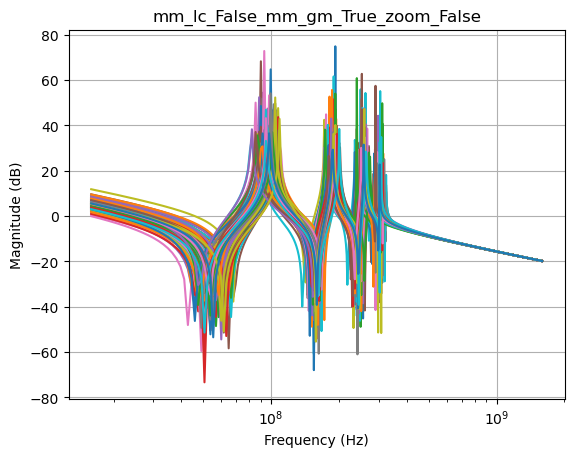

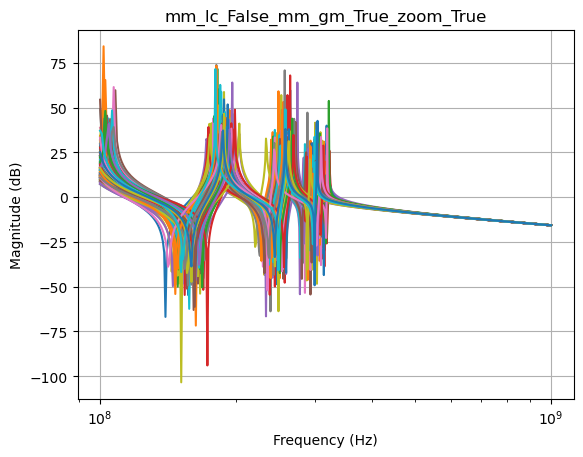

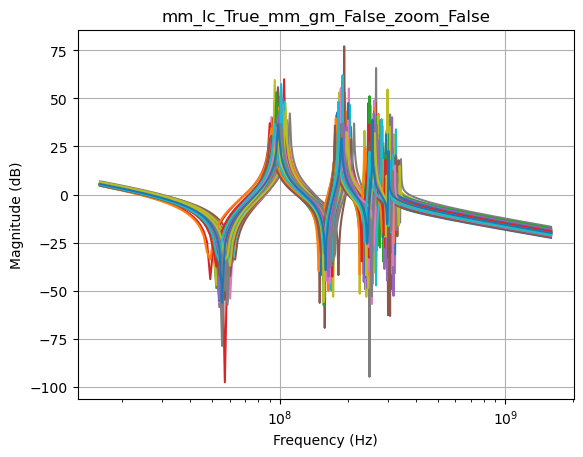

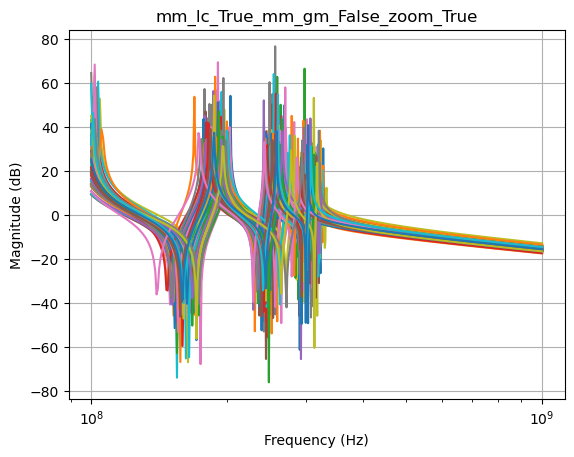

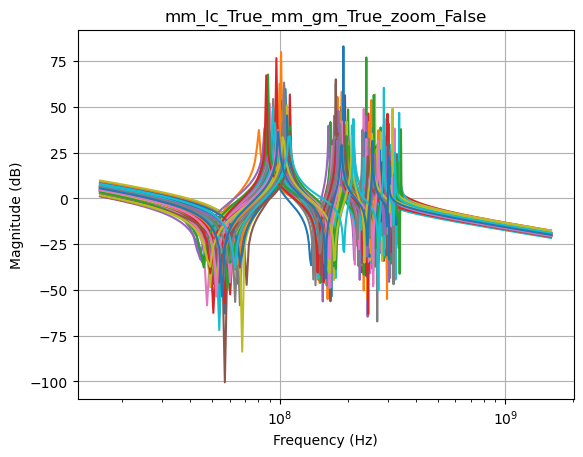

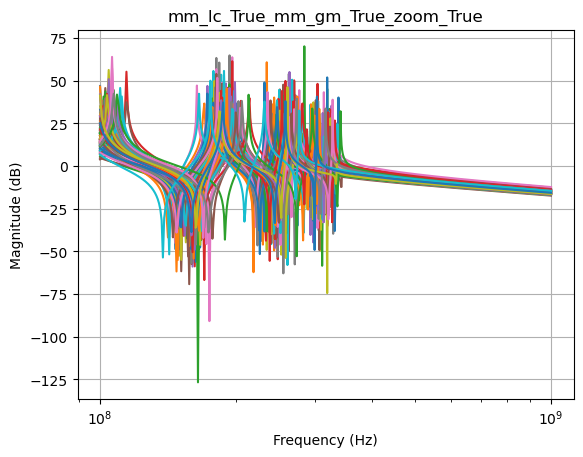

In [5]:
lc_val = 1e-9
def flatten_list(x):
    while isinstance(x[0], list):
        x = sum(x, [])
    return x
cap_flat = flatten_list(cap)
ind_flat = flatten_list(ind)
gm_c_flat = flatten_list(gm_c)
gm_l_flat = flatten_list(gm_l)
switch_flat = flatten_list(sw_bits)

# plot the bode plot
w = np.linspace(1e-1, 10, 5000) / lc_val

plt.figure()

# Plot mismatch
n_mismatch = 100
for mm_lc, mm_gm in [(False, True), (True, False), (True, True)]:
    for zoom_in in [False, True]:
        title = f"mm_lc_{mm_lc}_mm_gm_{mm_gm}_zoom_{zoom_in}"
        save_name = f"{title}.png"
        if zoom_in:
            w = 2 * np.pi * np.linspace(1e8, 1e9, 1000)
        else:
            w = np.linspace(1e-1, 10, 1000) / lc_val
        for i in range(n_mismatch + 1):
            if i == n_mismatch:
                gm_sub = {gm: 1 for gm in gm_c_flat + gm_l_flat}
                lc_sub = {element: lc_val for element in cap_flat + ind_flat}
                switch_sub = {element: 1 for element in switch_flat}
                nominal_val = gm_sub | lc_sub | {cc: lc_val} | switch_sub
                color = 'red'
            else:
                gm_sub = {gm: np.random.normal(1, 0.1) if mm_gm else 1 for gm in gm_c_flat + gm_l_flat}
                lc_sub = {element: np.random.normal(1, 0.1) * lc_val if mm_lc else lc_val for element in cap_flat + ind_flat}
                switch_sub = {element: 1 for element in switch_flat}
                nominal_val = gm_sub | lc_sub | {cc: np.random.normal(1, 0.1) * lc_val if mm_lc else lc_val} | switch_sub
                color = 'blue'

            A_mat_nominal = np.array(A_mat.subs(nominal_val)).astype(np.float64)
            B_mat_nominal = np.array(B_mat.subs(nominal_val)).astype(np.float64)
            C_mat_nominal = np.array(C_mat.subs(nominal_val)).astype(np.float64)
            D_mat_nominal = np.array(D_mat.subs(nominal_val)).astype(np.float64)


            ss = signal.StateSpace(A_mat_nominal, B_mat_nominal, C_mat_nominal, D_mat_nominal)
            w, mag, phase = signal.bode(ss, w=w)
            freq = w / (2 * np.pi)
            plt.semilogx(freq, mag)
        # plt.ylim(100, -100)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude (dB)")
        plt.grid(True)
        plt.title(title)
        plt.savefig(save_name, dpi=150, bbox_inches='tight')
        plt.show()

In [6]:
# Use the same sample for (L_ij0, C_ij1)
# and (C_ij0, L_i{j+1}1)

gm_sub_coupled_gm = {}
for i in range(n_bit):
    gm_sub_coupled_gm[gm_l[i][0][1]] = np.random.normal(1, 0.1)
    for j in range(line_len):
        gm_j_ind = np.random.normal(1, 0.1)
        gm_j_cap = np.random.normal(1, 0.1)
        gm_sub_coupled_gm[gm_l[i][j][0]] = gm_sub_coupled_gm[gm_c[i][j][1]] = gm_j_cap
        if j + 1 < line_len:
            gm_sub_coupled_gm[gm_c[i][j][0]] = gm_sub_coupled_gm[gm_l[i][j + 1][1]] = gm_j_ind

print(gm_sub_coupled_gm)

{g_L_0_0_1: 0.7844394607903539, g_L_0_0_0: 0.8802371776482101, g_C_0_0_1: 0.8802371776482101, g_C_0_0_0: 1.0275178882199385, g_L_0_1_1: 1.0275178882199385, g_L_0_1_0: 0.9506021669303903, g_C_0_1_1: 0.9506021669303903, g_C_0_1_0: 1.0805816767702328, g_L_0_2_1: 1.0805816767702328, g_L_0_2_0: 1.1366463510104265, g_C_0_2_1: 1.1366463510104265, g_C_0_2_0: 1.0474173486695275, g_L_0_3_1: 1.0474173486695275, g_L_0_3_0: 1.0094990962609722, g_C_0_3_1: 1.0094990962609722}


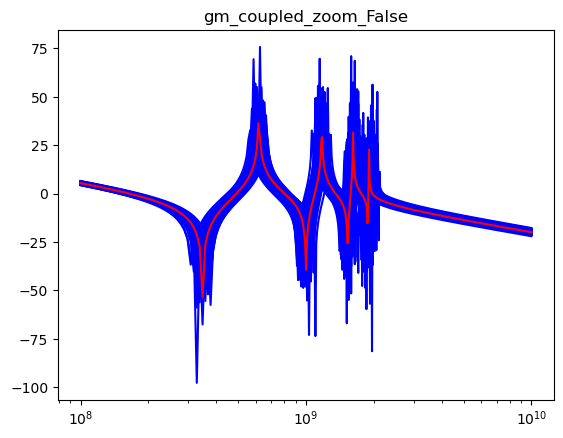

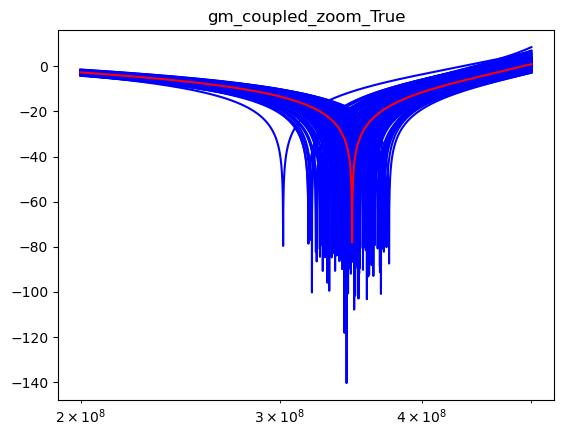

In [7]:
# Plot response for g coupled within the same row

# Plot mismatch
n_mismatch = 100
for zoom_in in [False, True]:
    title = f"gm_coupled_zoom_{zoom_in}"
    save_name = f"{title}.png"
    if zoom_in:
        w = np.linspace(2e-1, 5e-1, 5000) / lc_val
    else:
        w = np.linspace(1e-1, 10, 1000) / lc_val
    for i in range(n_mismatch + 1):
        if i == n_mismatch:
            gm_sub = {gm: 1 for gm in gm_c_flat + gm_l_flat}
            lc_sub = {element: lc_val for element in cap_flat + ind_flat}
            switch_sub = {element: 1 for element in switch_flat}
            nominal_val = gm_sub | lc_sub | {cc: lc_val} | switch_sub
            color = 'red'
        else:
            # Fixed gm and LC mismatches applied in reciprocal have the same effect
            # of the same mismatch applied in the same row
            gm_sub = {gm: 1 for gm in gm_c_flat + gm_l_flat}
            lc_sub = {element: 1 / np.random.normal(1, 0.1) * lc_val for element in cap_flat + ind_flat}
            switch_sub = {element: 1 for element in switch_flat}
            nominal_val = gm_sub | lc_sub | {cc: 1 / np.random.normal(1, 0.1) * lc_val} | switch_sub
            color = 'blue'

        A_mat_nominal = np.array(A_mat.subs(nominal_val)).astype(np.float64)
        B_mat_nominal = np.array(B_mat.subs(nominal_val)).astype(np.float64)
        C_mat_nominal = np.array(C_mat.subs(nominal_val)).astype(np.float64)
        D_mat_nominal = np.array(D_mat.subs(nominal_val)).astype(np.float64)


        ss = signal.StateSpace(A_mat_nominal, B_mat_nominal, C_mat_nominal, D_mat_nominal)
        w, mag, phase = signal.bode(ss, w=w)
        plt.semilogx(w, mag, color=color)
    # plt.ylim(100, -100)
    plt.title(title)
    plt.savefig(save_name, dpi=150, bbox_inches='tight')
    plt.show()

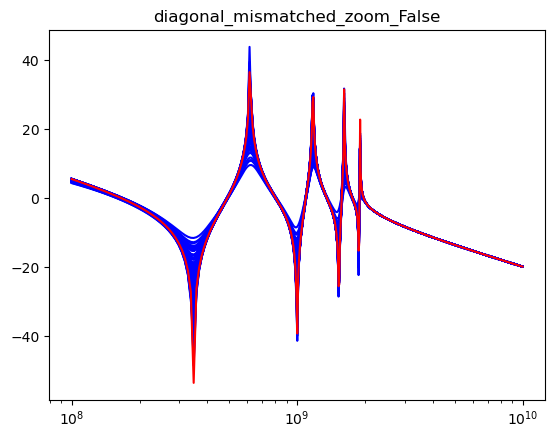

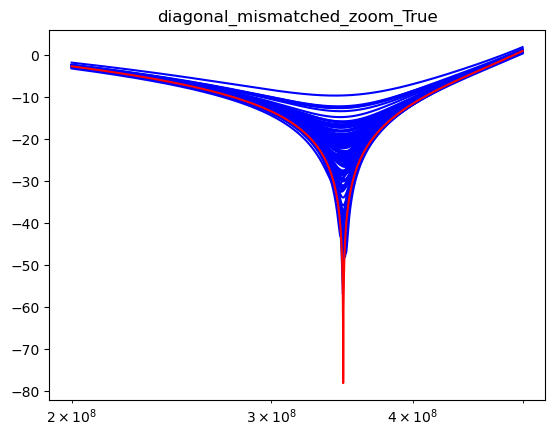

In [8]:
# Plot response for mismatched diagonal terms

# Plot mismatch
n_mismatch = 100
loss_std = 0.05 / lc_val
for zoom_in in [False, True]:
    title = f"diagonal_mismatched_zoom_{zoom_in}"
    save_name = f"{title}.png"
    if zoom_in:
        w = np.linspace(2e-1, 5e-1, 5000) / lc_val
    else:
        w = np.linspace(1e-1, 10, 1000) / lc_val
    for i in range(n_mismatch + 1):
        gm_sub = {gm: 1 for gm in gm_c_flat + gm_l_flat}
        lc_sub = {element: lc_val for element in cap_flat + ind_flat}
        switch_sub = {element: 1 for element in switch_flat}
        nominal_val = gm_sub | lc_sub | {cc: lc_val} | switch_sub
        A_mat_nominal = np.array(A_mat.subs(nominal_val)).astype(np.float64)
        B_mat_nominal = np.array(B_mat.subs(nominal_val)).astype(np.float64)
        C_mat_nominal = np.array(C_mat.subs(nominal_val)).astype(np.float64)
        D_mat_nominal = np.array(D_mat.subs(nominal_val)).astype(np.float64)
        if i == n_mismatch:
            color = 'red'
        else:
            for i in range(A_mat.shape[0]):
                A_mat_nominal[i, i] = np.random.normal(0, loss_std)
            color = 'blue'

        ss = signal.StateSpace(A_mat_nominal, B_mat_nominal, C_mat_nominal, D_mat_nominal)
        w, mag, phase = signal.bode(ss, w=w)
        plt.semilogx(w, mag, color=color)
    # plt.ylim(100, -100)
    plt.title(title)
    plt.savefig(save_name, dpi=150, bbox_inches='tight')
    plt.show()

In [9]:
from sympy import Float
def sspuf_A_matrix_nauta(n_bit: int, line_len: int):
    """Generate A matrix for SSPUF symbolic model using nauta circuit
    model and measured gms from transistor-level simulation.

    Here we drop the L and C notation and use gms and caps directly.

    Args:
        n_bit (int): number of bits
        line_len (int): length of line (number of LC sections)

    Returns:
        Matrix: A matrix
    """

    assert n_bit == 1, "Only 1-bit is modeled for now."
    gmff_gout_weight = Float(1 / 6.68, 3)
    gmfb_gout_weight = Float(1 / 6.68, 3)
    gmd_gout_weight = Float(1 + 1 / 6.68, 3)
    gmcc_gout_weight = Float(-(1 - 1 / 6.68), 3)
    mid_cap = sp.var('C_mid')
    mid_gm_fb = sp.var('gm_fb_mid')
    mid_gm_d = sp.var('gm_d_mid')
    mid_gm_cc = sp.var('gm_cc_mid')

    # caps: integrator capacitance
    # gm_ff: feedforward gm
    # gm_fb: feedback gm
    # gm_d:  gm connected  to output
    # gm_cc: cross-coupled gm
    caps = [[sp.var(f'C_{bit}_{i}') for i in range(2 * line_len)] for bit in range(n_bit)]
    gm_ffs =  [[sp.var(f'gm_ff-_{bit}_{i}') for i in range(2 * line_len)] for bit in range(n_bit)]
    gm_fbs =  [[sp.var(f'gm_fb-_{bit}_{i}') for i in range(2 * line_len)] for bit in range(n_bit)]
    gm_ds =  [[sp.var(f'gm_d-_{bit}_{i}') for i in range(2 * line_len)] for bit in range(n_bit)]
    gm_ccs =  [[sp.var(f'gm_cc-_{bit}_{i}') for i in range(2 * line_len)] for bit in range(n_bit)]
    sw_bits = [sp.var(f'b_{i}') for i in range(n_bit)]
    
    sub_mat_len = 2 * line_len
    def ith_diag_sub_mat(i: int):
        a_i = sp.zeros(sub_mat_len, sub_mat_len)
        for j in range(sub_mat_len):
            if j != 0:
                a_i[j, j - 1] = gm_ffs[i][j]
            
            gout = (gm_ffs[i][j] * gmff_gout_weight +  
                  gm_ds[i][j] * gmd_gout_weight+ 
                  gm_ccs[i][j] * gmcc_gout_weight)
            
            if j != sub_mat_len - 1:
                a_i[j, j + 1] = -gm_fbs[i][j]
                gout += gm_fbs[i][j] * gmfb_gout_weight # has feedback term except the last one
            
            a_i[j, j] = - gout / 2
        return a_i
    
    ai_row_mats = [ith_diag_sub_mat(i) for i in range(n_bit)]
    for i, diag_mat in enumerate(ai_row_mats):
        left_zeros = sp.zeros(sub_mat_len, sub_mat_len * i)
        right_zeros = sp.zeros(sub_mat_len, sub_mat_len * (n_bit - i - 1))
        ai_row_mats[i] = left_zeros.row_join(diag_mat).row_join(right_zeros)
    

    mid_to_branch_row = sp.zeros(1, sub_mat_len * n_bit)
    mid_to_branch_col = sp.zeros(sub_mat_len * n_bit, 1)
    for i in range(n_bit):
        mid_to_branch_row[0, i * sub_mat_len] = -sw_bits[i] * mid_gm_fb
        mid_to_branch_col[i * sub_mat_len, 0] = sw_bits[i] * gm_ffs[i][0]
    
    A_1_to_n = mid_to_branch_row
    for ai_row_mat in ai_row_mats:
        A_1_to_n = A_1_to_n.col_join(ai_row_mat)
    

    A_mat = sp.zeros(1, 1).col_join(mid_to_branch_col).row_join(A_1_to_n)
    mid_gout = (mid_gm_fb * gmfb_gout_weight + 
                mid_gm_d * gmd_gout_weight + 
                mid_gm_cc * gmcc_gout_weight)
    A_mat[0, 0] = - mid_gout / 2

    LC_mat = sp.zeros(A_mat.shape[0], A_mat.shape[1])
    LC_mat[0, 0] = 1/mid_cap
    for i in range(n_bit):
        for j in range(sub_mat_len):
            idx = 1 + i * sub_mat_len +  j
            LC_mat[idx, idx] = 1/caps[i][j]

    return LC_mat * A_mat, mid_cap, mid_gm_fb, mid_gm_d, mid_gm_cc, caps, gm_ffs, gm_fbs, gm_ds, gm_ccs, sw_bits


n_bit, line_len = 1, 4
A_mat, mid_cap, mid_gm_fb, mid_gm_d, mid_gm_cc, caps, gm_ffs, gm_fbs, gm_ds, gm_ccs, sw_bits = sspuf_A_matrix_nauta(n_bit, line_len)
B_mat, C_mat, D_mat = sp.zeros(A_mat.shape[0], 1), sp.zeros(1, A_mat.shape[0]), sp.zeros(1, 1)
B_mat[0, 0] = 1/mid_cap
C_mat[0, 0] = 1

print("A matrix:")
display(A_mat)
print("B matrix:")
display(B_mat)
print("C matrix:")
display(C_mat)
print("D matrix:")
display(D_mat)

A matrix:


Matrix([
[(0.425*gm_cc_mid - 0.575*gm_d_mid - 0.0748*gm_fb_mid)/C_mid,                                                               -b_0*gm_fb_mid/C_mid,                                                                                  0,                                                                                  0,                                                                                  0,                                                                                  0,                                                                                  0,                                                                                  0,                                                              0],
[                                       b_0*gm_ff-_0_0/C_0_0, (0.425*gm_cc-_0_0 - 0.575*gm_d-_0_0 - 0.0748*gm_fb-_0_0 - 0.0748*gm_ff-_0_0)/C_0_0,                                                                  -gm_fb-_0_0/C_0_0,                                               

B matrix:


Matrix([
[1/C_mid],
[      0],
[      0],
[      0],
[      0],
[      0],
[      0],
[      0],
[      0]])

C matrix:


Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0]])

D matrix:


Matrix([[0]])

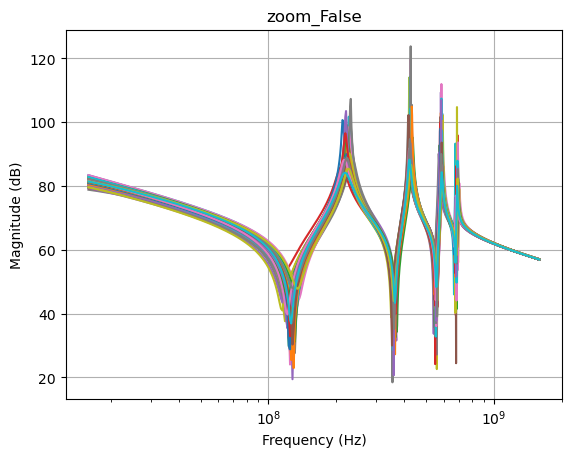

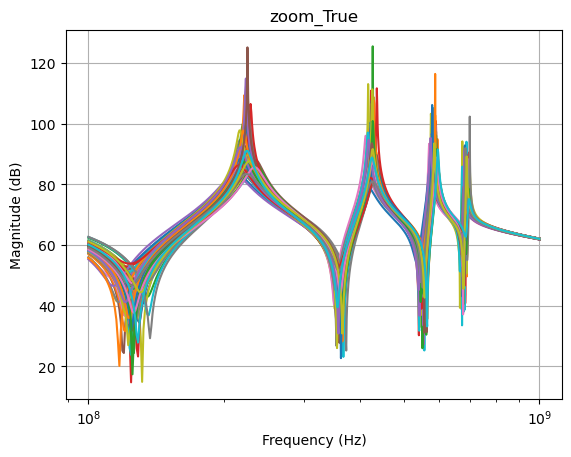

In [ ]:
mid_cap, mid_gm_fb, mid_gm_d, mid_gm_cc, caps, gm_ffs, gm_fbs, gm_ds, gm_ccs, sw_bits

cap_flat = flatten_list(caps)
gm_ffs_flat = flatten_list(gm_ffs)
gm_fbs_flat = flatten_list(gm_fbs)
gm_ds_flat = flatten_list(gm_ds)
gm_ccs_flat = flatten_list(gm_ccs)
switch_flat = flatten_list(sw_bits)

cap_val = 150e-15
gmff_mean, gmff_rstd = 340.5e-6, 0.0303
gmfb_mean, gmfb_rstd = 340.7e-6, 0.0308
gmd_mean, gmd_rstd = 340.5e-6, 0.0295
gmcc_mean, gmcc_rstd = 574e-6, 0.0242


# plot the bode plot
w = np.linspace(1e-1, 10, 5000) / lc_val

plt.figure()

# Plot mismatch
n_mismatch = 100
for zoom_in in [False, True]:
    title = f"zoom_{zoom_in}"
    save_name = f"{title}.png"
    if zoom_in:
        w = 2 * np.pi * np.linspace(1e8, 1e9, 1000)
    else:
        w = np.linspace(1e-1, 10, 1000) / lc_val
    for i in range(n_mismatch):
        gmff_sub = {gm: np.random.normal(1, gmff_rstd) * gmff_mean for gm in gm_ffs_flat}
        gmfb_sub = {gm: np.random.normal(1, gmfb_rstd) * gmfb_mean for gm in gm_fbs_flat + [mid_gm_fb]}
        gmd_sub = {gm: np.random.normal(1, gmd_rstd) * gmd_mean for gm in gm_ds_flat + [mid_gm_d]}
        gmcc_sub = {gm: np.random.normal(1, gmcc_rstd) * gmcc_mean for gm in gm_ccs_flat + [mid_gm_cc]}
        cap_sub = {cap: cap_val for cap in cap_flat} | {mid_cap: cap_val}
        switch_sub = {element: 1 for element in switch_flat}
        mm_val = gmff_sub | gmfb_sub | gmd_sub | gmcc_sub | cap_sub | switch_sub

        A_mat_mm = np.array(A_mat.subs(mm_val)).astype(np.float64)
        B_mat_mm = np.array(B_mat.subs(mm_val)).astype(np.float64)
        C_mat_mm = np.array(C_mat.subs(mm_val)).astype(np.float64)
        D_mat_mm = np.array(D_mat.subs(mm_val)).astype(np.float64)

        # display(A_mat.subs(mm_val))

        ss = signal.StateSpace(A_mat_mm, B_mat_mm, C_mat_mm, D_mat_mm)
        w, mag, phase = signal.bode(ss, w=w)
        freq = w / (2 * np.pi)
        plt.semilogx(freq, mag)
    # plt.ylim(100, -100)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True)
    plt.title(title)
    plt.savefig(save_name, dpi=150, bbox_inches='tight')
    plt.show()

In [28]:
# Solve state-space equations considering Cgd
# Example: 3 integrators, 2 Cgd
def integrator_chain_w_cgd(length: int):
    rs = [sp.var(f'R_{i}') for i in range(length)]
    cs = [sp.var(f'C_{i}') for i in range(length)]
    Gms = [sp.var(f'Gm_{i}') for i in range(length)]
    Cgds = [sp.var(f'Cgd_{i}') for i in range(length)]
    Vs = [sp.var(f'V_{i}') for i in range(length)]

    A_rows, B_elements = [], []
    for i in range(length):
        row = [0 for _ in range(length)]
        if i == 0:
            row[i] = cs[i] + Cgds[i + 1]
            row[i+1] = -Cgds[i + 1]
            A_rows.append(row)
            B_elements.append(-Vs[i] / rs[i])
        elif i == length - 1:
            row[i-1] = -Cgds[i]
            row[i] = cs[i] + Cgds[i]
            A_rows.append(row)
            B_elements.append(-Gms[i] * Vs[i-1] - Vs[i] / rs[i])
        else:
            row[i-1] = -Cgds[i]
            row[i] = cs[i] + Cgds[i] + Cgds[i+1]
            row[i+1] = -Cgds[i+1]
            A_rows.append(row)
            B_elements.append(-Gms[i] * Vs[i-1] - Vs[i] / rs[i])
    # Solve Ax=b
    A = sp.Matrix(A_rows)
    b = sp.Matrix(B_elements)
    xs = sp.Matrix([sp.var(f'dV_{i}') / sp.var("dt") for i in range(length)])
    sys_eq = sp.Eq(sp.MatMul(A, xs), b)
    print("Original system equations:")
    display(sys_eq)

    solution = A.LUsolve(b)
    sol_eq = sp.Eq(xs, solution)
    print("State-space equations:")
    display(sol_eq)

    sol_eq_no_cgd = sp.Eq(xs, solution.subs({c: 0 for c in Cgds}))
    print("State-space equations with 0 Cgd:")
    display(sol_eq_no_cgd)

integrator_chain_w_cgd(5)

Original system equations:


Eq(Matrix([
[C_0 + Cgd_1,              -Cgd_1,                   0,                   0,           0],
[     -Cgd_1, C_1 + Cgd_1 + Cgd_2,              -Cgd_2,                   0,           0],
[          0,              -Cgd_2, C_2 + Cgd_2 + Cgd_3,              -Cgd_3,           0],
[          0,                   0,              -Cgd_3, C_3 + Cgd_3 + Cgd_4,      -Cgd_4],
[          0,                   0,                   0,              -Cgd_4, C_4 + Cgd_4]])*Matrix([
[dV_0/dt],
[dV_1/dt],
[dV_2/dt],
[dV_3/dt],
[dV_4/dt]]), Matrix([
[           -V_0/R_0],
[-Gm_1*V_0 - V_1/R_1],
[-Gm_2*V_1 - V_2/R_2],
[-Gm_3*V_2 - V_3/R_3],
[-Gm_4*V_3 - V_4/R_4]]))

State-space equations:


Eq(Matrix([
[dV_0/dt],
[dV_1/dt],
[dV_2/dt],
[dV_3/dt],
[dV_4/dt]]), Matrix([
[(Cgd_1*(-Cgd_1*V_0/(R_0*(C_0 + Cgd_1)) + Cgd_2*(Cgd_2*(-Cgd_1*V_0/(R_0*(C_0 + Cgd_1)) - Gm_1*V_0 - V_1/R_1)/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) + Cgd_3*(Cgd_3*(Cgd_2*(-Cgd_1*V_0/(R_0*(C_0 + Cgd_1)) - Gm_1*V_0 - V_1/R_1)/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) - Gm_2*V_1 - V_2/R_2)/(C_2 - Cgd_2**2/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) + Cgd_2 + Cgd_3) + Cgd_4*(Cgd_4*(Cgd_3*(Cgd_2*(-Cgd_1*V_0/(R_0*(C_0 + Cgd_1)) - Gm_1*V_0 - V_1/R_1)/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) - Gm_2*V_1 - V_2/R_2)/(C_2 - Cgd_2**2/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) + Cgd_2 + Cgd_3) - Gm_3*V_2 - V_3/R_3)/(C_3 - Cgd_3**2/(C_2 - Cgd_2**2/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) + Cgd_2 + Cgd_3) + Cgd_3 + Cgd_4) - Gm_4*V_3 - V_4/R_4)/(C_4 - Cgd_4**2/(C_3 - Cgd_3**2/(C_2 - Cgd_2**2/(C_1 - Cgd_1**2/(C_0 + Cgd_1) + Cgd_1 + Cgd_2) + Cgd_2 + Cgd_3) + Cgd_3 + Cgd_4) + Cgd_4) - Gm_3*V_2 - V

State-space equations with 0 Cgd:


Eq(Matrix([
[dV_0/dt],
[dV_1/dt],
[dV_2/dt],
[dV_3/dt],
[dV_4/dt]]), Matrix([
[           -V_0/(C_0*R_0)],
[(-Gm_1*V_0 - V_1/R_1)/C_1],
[(-Gm_2*V_1 - V_2/R_2)/C_2],
[(-Gm_3*V_2 - V_3/R_3)/C_3],
[(-Gm_4*V_3 - V_4/R_4)/C_4]]))